# Saving, loading and downloading

In [2]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
from PyCUB import pyCUB 
import matplotlib.pyplot as plt

 ### we are creating our main object and loading all the files that we don't already have

In [203]:
cub = pyCUB.PyCUB(session = 'jerem')
cub.get_data(From='yun', all=True)

working on session: jerem
you already have a session here (just a warning)
downloading homology4001t4500.zip with urllib
downloading homology4501t5000.zip with urllib
downloading homology1t500.zip with urllib
downloading homology2001t2500.zip with urllib
file is already there
file is already there
file is already there
file is already there
downloading homology601t1000.zip with urllib
downloading homology1001t2000.zip with urllib
downloading homology2501t3000.zip with urllib
file is already there
downloading homology3001t3500.zip with urllib
file is already there
file is already there
downloading homology3501t4000.zip with urllib
file is already there
file is already there


### we now load them in our project, it will be stored in the homoset object

In [204]:
cub.load(From = 'yun', filename='all')

Reviewing all the 9234 files
at homology YAL001C we have 76 species possessing it
at homology YAL014C we have 60 species possessing it
at homology YAL008W we have 5 species possessing it
at homology YAL017W we have 217 species possessing it
at homology YAL047C we have 23 species possessing it
at homology YAL027W we have 24 species possessing it
at homology YAL022C we have 198 species possessing it
at homology YAR002C-A we have 59 species possessing it
at homology YAR002W we have 49 species possessing it
at homology YAR050W we have 49 species possessing it
at homology YBL002W we have 272 species possessing it
at homology YBL015W we have 312 species possessing it
at homology YBL021C we have 210 species possessing it
at homology YBL016W we have 320 species possessing it
at homology YBL025W we have 26 species possessing it
at homology YBL030C we have 309 species possessing it
at homology YBL033C we have 197 species possessing it
at homology YBL038W we have 278 species possessing it
at homo

at homology YGL021W we have 22 species possessing it
at homology YGL008C we have 288 species possessing it
at homology YGL023C we have 307 species possessing it
at homology YGL031C we have 312 species possessing it
at homology YGL063W we have 162 species possessing it
at homology YGL049C we have 367 species possessing it
at homology YGL083W we have 184 species possessing it
at homology YGL095C we have 306 species possessing it
at homology YGL106W we have 39 species possessing it
at homology YGL105W we have 187 species possessing it
at homology YGL126W we have 25 species possessing it
at homology YGL133W we have 195 species possessing it
at homology YGL145W we have 24 species possessing it
at homology YGL184C we have 191 species possessing it
at homology YGL185C we have 137 species possessing it
at homology YGL211W we have 219 species possessing it
at homology YGL227W we have 138 species possessing it
at homology YGL242C we have 217 species possessing it
at homology YGR006W we have 191 

at homology YKR082W we have 209 species possessing it
at homology YLL034C we have 364 species possessing it
at homology YLL035W we have 227 species possessing it
at homology YLL058W we have 345 species possessing it
at homology YLR008C we have 177 species possessing it
at homology YLR009W we have 220 species possessing it
at homology YLR012C we have 11 species possessing it
at homology YLR022C we have 211 species possessing it
at homology YLR044C we have 314 species possessing it
at homology YLR052W we have 24 species possessing it
at homology YLR055C we have 195 species possessing it
at homology YLR090W we have 28 species possessing it
at homology YLR091W we have 19 species possessing it
at homology YLR103C we have 199 species possessing it
at homology YLR107W we have 393 species possessing it
at homology YLR120C we have 93 species possessing it
at homology YLR121C we have 91 species possessing it
at homology YLR128W we have 258 species possessing it
at homology YLR134W we have 314 sp

at homology YPL052W we have 19 species possessing it
at homology YPL038W we have 57 species possessing it
at homology YPL070W we have 26 species possessing it
at homology YPL063W we have 302 species possessing it
at homology YPL082C we have 194 species possessing it
at homology YPL151C we have 92 species possessing it
at homology YPL127C we have 306 species possessing it
at homology YPL163C we have 7 species possessing it
at homology YPL172C we have 297 species possessing it
at homology YPL199C we have 229 species possessing it
at homology YPL201C we have 11 species possessing it
at homology YPL208W we have 166 species possessing it
at homology YPL252C we have 284 species possessing it
at homology YPL267W we have 19 species possessing it
at homology YPL277C we have 239 species possessing it
at homology YPL273W we have 340 species possessing it
at homology YPR049C we have 300 species possessing it
at homology YPR054W we have 160 species possessing it
at homology YPR071W we have 1 specie

at homology YEL017C-A we have 11 species possessing it
at homology YEL015W we have 298 species possessing it
at homology YEL037C we have 201 species possessing it
at homology YEL058W we have 305 species possessing it
at homology YEL061C we have 75 species possessing it
at homology YEL070W we have 95 species possessing it
at homology YER008C we have 195 species possessing it
at homology YER013W we have 215 species possessing it
at homology YER017C we have 195 species possessing it
at homology YER026C we have 204 species possessing it
at homology YER038C we have 23 species possessing it
at homology YER054C we have 22 species possessing it
at homology YER055C we have 190 species possessing it
at homology YER088C we have 63 species possessing it
at homology YER104W we have 14 species possessing it
at homology YER118C we have 252 species possessing it
at homology YER132C we have 55 species possessing it
at homology YER139C we have 60 species possessing it
at homology YER143W we have 366 spe

at homology YKL062W we have 227 species possessing it
at homology YKL125W we have 279 species possessing it
at homology YKL173W we have 82 species possessing it
at homology YKL150W we have 354 species possessing it
at homology YKL187C we have 23 species possessing it
at homology YKL192C we have 189 species possessing it
at homology YKR010C we have 31 species possessing it
at homology YKR007W we have 24 species possessing it
at homology YKR044W we have 27 species possessing it
at homology YKR056W we have 210 species possessing it
at homology YKR072C we have 182 species possessing it
at homology YKR083C we have 26 species possessing it
at homology YKR084C we have 286 species possessing it
at homology YKR106W we have 31 species possessing it
at homology YKR098C we have 49 species possessing it
at homology YKR091W we have 4 species possessing it
at homology YLL036C we have 216 species possessing it
at homology YLL041C we have 300 species possessing it
at homology YLL012W we have 350 specie

at homology YOR066W we have 25 species possessing it
at homology YOR073W we have 38 species possessing it
at homology YOR069W we have 202 species possessing it
at homology YOR079C we have 186 species possessing it
at homology YOR117W we have 220 species possessing it
at homology YOR119C we have 307 species possessing it
at homology YOR122C we have 248 species possessing it
at homology YOR152C we have 11 species possessing it
at homology YOR181W we have 241 species possessing it
at homology YOR201C we have 317 species possessing it
at homology YOR205C we have 61 species possessing it
at homology YOR208W we have 62 species possessing it
at homology YOR275C we have 273 species possessing it
at homology YOR288C we have 61 species possessing it
at homology YOR305W we have 56 species possessing it
at homology YOR306C we have 140 species possessing it
at homology YOR312C we have 308 species possessing it
at homology YOR341W we have 229 species possessing it
at homology YOR335C we have 228 spe

at homology YDR116C we have 263 species possessing it
at homology YDR176W we have 239 species possessing it
at homology YDR179W-A we have 24 species possessing it
at homology YDR181C we have 25 species possessing it
at homology YDR206W we have 52 species possessing it
at homology YDR246W we have 382 species possessing it
at homology YDR247W we have 305 species possessing it
at homology YDR264C we have 240 species possessing it
at homology YDR270W we have 258 species possessing it
at homology YDR291W we have 187 species possessing it
at homology YDR301W we have 239 species possessing it
at homology YDR322W we have 280 species possessing it
at homology YDR335W we have 325 species possessing it
at homology YDR338C we have 65 species possessing it
at homology YDR339C we have 207 species possessing it
at homology YDR374W-A we have 3 species possessing it
at homology YDR406W we have 220 species possessing it
at homology YDR412W we have 299 species possessing it
at homology YDR422C we have 47

at homology YJL055W we have 173 species possessing it
at homology YJL062W-A we have 61 species possessing it
at homology YJL070C we have 35 species possessing it
at homology YJL081C we have 215 species possessing it
at homology YJL085W we have 191 species possessing it
at homology YJL129C we have 333 species possessing it
at homology YJL160C we have 103 species possessing it
at homology YJL167W we have 269 species possessing it
at homology YJL190C we have 369 species possessing it
at homology YJL193W we have 178 species possessing it
at homology YJR006W we have 302 species possessing it
at homology YJR016C we have 188 species possessing it
at homology YJR022W we have 23 species possessing it
at homology YJR025C we have 207 species possessing it
at homology YJR048W we have 289 species possessing it
at homology YJR061W we have 95 species possessing it
at homology YJR070C we have 222 species possessing it
at homology YJR078W we have 301 species possessing it
at homology YJR086W we have 22

at homology YOL005C we have 272 species possessing it
at homology YOL029C we have 13 species possessing it
at homology YOL028C we have 14 species possessing it
at homology YOL030W we have 367 species possessing it
at homology YOL031C we have 61 species possessing it
at homology YOL069W we have 179 species possessing it
at homology YOL056W we have 109 species possessing it
at homology YOL059W we have 335 species possessing it
at homology YOL034W we have 225 species possessing it
at homology YOL084W we have 65 species possessing it
at homology YOL101C we have 7 species possessing it
at homology YOL113W we have 201 species possessing it
at homology YOL140W we have 279 species possessing it
at homology YOL148C we have 292 species possessing it
at homology YOR021C we have 197 species possessing it
at homology YOR027W we have 380 species possessing it
at homology YOR035C we have 269 species possessing it
at homology YOR049C we have 278 species possessing it
at homology YOR061W we have 110 sp

at homology YDR054C we have 378 species possessing it
at homology YDR064W we have 228 species possessing it
at homology YDR071C we have 323 species possessing it
at homology YDR079W we have 281 species possessing it
at homology YDR100W we have 310 species possessing it
at homology YDR091C we have 274 species possessing it
at homology YDR142C we have 263 species possessing it
at homology YDR162C we have 304 species possessing it
at homology YDR177W we have 278 species possessing it
at homology YDR182W we have 199 species possessing it
at homology YDR196C we have 256 species possessing it
at homology YDR210W we have 2 species possessing it
at homology YDR212W we have 218 species possessing it
at homology YDR226W we have 183 species possessing it
at homology YDR228C we have 305 species possessing it
at homology YDR234W we have 258 species possessing it
at homology YDR236C we have 304 species possessing it
at homology YDR257C we have 280 species possessing it
at homology YDR272W we have 20

at homology YIR023W we have 207 species possessing it
at homology YIR025W we have 12 species possessing it
at homology YIR033W we have 224 species possessing it
at homology YJL039C we have 209 species possessing it
at homology YIR035C we have 278 species possessing it
at homology YJL072C we have 390 species possessing it
at homology YJL089W we have 301 species possessing it
at homology YJL118W we have 2 species possessing it
at homology YJL104W we have 182 species possessing it
at homology YJL127C we have 251 species possessing it
at homology YJL130C we have 273 species possessing it
at homology YJL144W we have 4 species possessing it
at homology YJL146W we have 24 species possessing it
at homology YJL153C we have 204 species possessing it
at homology YJL181W we have 22 species possessing it
at homology YJL196C we have 109 species possessing it
at homology YJL213W we have 230 species possessing it
at homology YJR004C we have 130 species possessing it
at homology YJR005C-A we have 16 sp

at homology YNL033W we have 8 species possessing it
at homology YNL073W we have 341 species possessing it
at homology YNL077W we have 113 species possessing it
at homology YNL084C we have 319 species possessing it
at homology YNL122C we have 29 species possessing it
at homology YNL146W we have 3 species possessing it
at homology YNL149C we have 56 species possessing it
at homology YNL153C we have 182 species possessing it
at homology YNL154C we have 170 species possessing it
at homology YNL182C we have 213 species possessing it
at homology YNL159C we have 24 species possessing it
at homology YNL188W we have 22 species possessing it
at homology YNL196C we have 4 species possessing it
at homology YNL204C we have 23 species possessing it
at homology YNL220W we have 267 species possessing it
at homology YNL222W we have 201 species possessing it
at homology YNL245C we have 223 species possessing it
at homology YNL278W we have 283 species possessing it
at homology YNL256W we have 206 species

at homology YBR216C we have 59 species possessing it
at homology YBR217W we have 262 species possessing it
at homology YBR221C we have 189 species possessing it
at homology YBR231C we have 295 species possessing it
at homology YBR254C we have 194 species possessing it
at homology YBR259W we have 14 species possessing it
at homology YBR264C we have 212 species possessing it
at homology YBR267W we have 306 species possessing it
at homology YBR295W we have 243 species possessing it
at homology YBR298C we have 221 species possessing it
at homology YCL020W we have 12 species possessing it
at homology YCL030C we have 298 species possessing it
at homology YCL057C-A we have 377 species possessing it
at homology YCL063W we have 20 species possessing it
at homology YCL073C we have 31 species possessing it
at homology YCR012W we have 225 species possessing it
at homology YCR016W we have 62 species possessing it
at homology YCR020C-A we have 24 species possessing it
at homology YCR028C-A we have 2

at homology YHR039C-A we have 386 species possessing it
at homology YHR076W we have 190 species possessing it
at homology YHR084W we have 220 species possessing it
at homology YHR096C we have 37 species possessing it
at homology YHR133C we have 38 species possessing it
at homology YHR104W we have 206 species possessing it
at homology YHR157W we have 4 species possessing it
at homology YHR169W we have 212 species possessing it
at homology YHR176W we have 346 species possessing it
at homology YHR182W we have 18 species possessing it
at homology YHR191C we have 57 species possessing it
at homology YHR179W we have 256 species possessing it
at homology YHR192W we have 24 species possessing it
at homology YHR193C we have 204 species possessing it
at homology YHR194W we have 302 species possessing it
at homology YHR204W we have 286 species possessing it
at homology YIL006W we have 284 species possessing it
at homology YIL015W we have 140 species possessing it
at homology YIL007C we have 388 s

at homology YML064C we have 301 species possessing it
at homology YML085C we have 219 species possessing it
at homology YML100W we have 227 species possessing it
at homology YML104C we have 185 species possessing it
at homology YML110C we have 204 species possessing it
at homology YMR015C we have 298 species possessing it
at homology YMR017W we have 45 species possessing it
at homology YMR020W we have 208 species possessing it
at homology YMR023C we have 393 species possessing it
at homology YMR043W we have 301 species possessing it
at homology YMR041C we have 242 species possessing it
at homology YMR046C we have 12 species possessing it
at homology YMR069W we have 47 species possessing it
at homology YMR071C we have 317 species possessing it
at homology YMR084W we have 297 species possessing it
at homology YMR098C we have 64 species possessing it
at homology YMR113W we have 194 species possessing it
at homology YMR122W-A we have 15 species possessing it
at homology YMR119W we have 373

at homology YBR061C we have 359 species possessing it
at homology YBR043C we have 342 species possessing it
at homology YBR067C we have 9 species possessing it
at homology YBR069C we have 178 species possessing it
at homology YBR072W we have 56 species possessing it
at homology YBR079C we have 199 species possessing it
at homology YBR087W we have 236 species possessing it
at homology YBR094W we have 367 species possessing it
at homology YBR102C we have 195 species possessing it
at homology YBR107C we have 13 species possessing it
at homology YBR109C we have 219 species possessing it
at homology YBR114W we have 203 species possessing it
at homology YBR129C we have 21 species possessing it
at homology YBR120C we have 61 species possessing it
at homology YBR141C we have 177 species possessing it
at homology YBR142W we have 289 species possessing it
at homology YBR151W we have 348 species possessing it
at homology YBR173C we have 390 species possessing it
at homology YBR179C we have 211 sp

at homology YGL194C-A we have 2 species possessing it
at homology YGL178W we have 217 species possessing it
at homology YGL202W we have 144 species possessing it
at homology YGL194C we have 229 species possessing it
at homology YGL205W we have 216 species possessing it
at homology YGL206C we have 320 species possessing it
at homology YGL226C-A we have 17 species possessing it
at homology YGL254W we have 166 species possessing it
at homology YGR019W we have 193 species possessing it
at homology YGR031W we have 219 species possessing it
at homology YGR034W we have 222 species possessing it
at homology YGR036C we have 383 species possessing it
at homology YGR049W we have 24 species possessing it
at homology YGR060W we have 339 species possessing it
at homology YGR063C we have 215 species possessing it
at homology YGR086C we have 311 species possessing it
at homology YGR100W we have 214 species possessing it
at homology YGR104C we have 61 species possessing it
at homology YGR119C we have 2

at homology YLR241W we have 197 species possessing it
at homology YLR244C we have 354 species possessing it
at homology YLR250W we have 169 species possessing it
at homology YLR256W-A we have 11 species possessing it
at homology YLR267W we have 15 species possessing it
at homology YLR304C we have 301 species possessing it
at homology YLR306W we have 197 species possessing it
at homology YLR310C we have 234 species possessing it
at homology YLR318W we have 325 species possessing it
at homology YLR359W we have 356 species possessing it
at homology YLR332W we have 28 species possessing it
at homology YLR363C we have 22 species possessing it
at homology YLR372W we have 111 species possessing it
at homology YLR380W we have 279 species possessing it
at homology YLR384C we have 315 species possessing it
at homology YLR408C we have 22 species possessing it
at homology YLR413W we have 26 species possessing it
at homology YLR414C we have 56 species possessing it
at homology YLR425W we have 58 sp

at homology YPL150W we have 207 species possessing it
at homology YPL155C we have 191 species possessing it
at homology YPL156C we have 21 species possessing it
at homology YPL157W we have 313 species possessing it
at homology YPL168W we have 23 species possessing it
at homology YPL189W we have 321 species possessing it
at homology YPL227C we have 261 species possessing it
at homology YPL224C we have 195 species possessing it
at homology YPL229W we have 23 species possessing it
at homology YPL248C we have 275 species possessing it
at homology YPL254W we have 299 species possessing it
at homology YPL259C we have 199 species possessing it
at homology YPL262W we have 234 species possessing it
at homology YPL264C we have 265 species possessing it
at homology YPR019W we have 223 species possessing it
at homology YPR017C we have 20 species possessing it
at homology YPR032W we have 177 species possessing it
at homology YPR056W we have 266 species possessing it
at homology YPR062W we have 251 

at homology YEL077C we have 52 species possessing it
at homology YER019C-A we have 344 species possessing it
at homology YER053C we have 276 species possessing it
at homology YER085C we have 2 species possessing it
at homology YER074W we have 212 species possessing it
at homology YER091C we have 204 species possessing it
at homology YER100W we have 189 species possessing it
at homology YER094C we have 222 species possessing it
at homology YER103W we have 257 species possessing it
at homology YER114C we have 246 species possessing it
at homology YER121W we have 4 species possessing it
at homology YER149C we have 25 species possessing it
at homology YER158C we have 18 species possessing it
at homology YER151C we have 283 species possessing it
at homology YER169W we have 294 species possessing it
at homology YER173W we have 208 species possessing it
at homology YFL024C we have 339 species possessing it
at homology YFL017W-A we have 372 species possessing it
at homology YFR026C we have 1 s

at homology YKL197C we have 274 species possessing it
at homology YKR005C we have 12 species possessing it
at homology YKR052C we have 208 species possessing it
at homology YKR035W-A we have 190 species possessing it
at homology YKR089C we have 305 species possessing it
at homology YKR095W-A we have 56 species possessing it
at homology YKR097W we have 233 species possessing it
at homology YKR104W we have 273 species possessing it
at homology YLL005C we have 239 species possessing it
at homology YLL027W we have 279 species possessing it
at homology YLL033W we have 24 species possessing it
at homology YLL049W we have 8 species possessing it
at homology YLL061W we have 132 species possessing it
at homology YLR026C we have 201 species possessing it
at homology YLR032W we have 178 species possessing it
at homology YLR054C we have 25 species possessing it
at homology YLR072W we have 199 species possessing it
at homology YLR088W we have 182 species possessing it
at homology YLR093C we have 25

at homology YOR290C we have 62 species possessing it
at homology YOR280C we have 286 species possessing it
at homology YOR291W we have 293 species possessing it
at homology YOR304W we have 43 species possessing it
at homology YOR324C we have 11 species possessing it
at homology YOR317W we have 357 species possessing it
at homology YOR328W we have 216 species possessing it
at homology YOR329C we have 64 species possessing it
at homology YOR350C we have 15 species possessing it
at homology YOR337W we have 182 species possessing it
at homology YOR351C we have 159 species possessing it
at homology YOR356W we have 209 species possessing it
at homology YOR368W we have 58 species possessing it
at homology YOR382W we have 12 species possessing it
at homology YOR388C we have 221 species possessing it
at homology YPL046C we have 390 species possessing it
at homology YPL058C we have 186 species possessing it
at homology YPL059W we have 283 species possessing it
at homology YPL081W we have 210 spe

at homology YDR336W we have 344 species possessing it
at homology YDR351W we have 34 species possessing it
at homology YDR354W we have 294 species possessing it
at homology YDR358W we have 313 species possessing it
at homology YDR374C we have 153 species possessing it
at homology YDR390C we have 334 species possessing it
at homology YDR408C we have 238 species possessing it
at homology YDR438W we have 186 species possessing it
at homology YDR420W we have 260 species possessing it
at homology YDR458C we have 187 species possessing it
at homology YDR461W we have 19 species possessing it
at homology YDR482C we have 256 species possessing it
at homology YDR494W we have 21 species possessing it
at homology YDR502C we have 208 species possessing it
at homology YDR505C we have 234 species possessing it
at homology YDR545W we have 52 species possessing it
at homology YEL019C we have 60 species possessing it
at homology YEL036C we have 298 species possessing it
at homology YEL054C we have 180 s

at homology YKL023C-A we have 1 species possessing it
at homology YKL027W we have 286 species possessing it
at homology YKL028W we have 223 species possessing it
at homology YKL029C we have 197 species possessing it
at homology YKL053C-A we have 223 species possessing it
at homology YKL056C we have 300 species possessing it
at homology YKL058W we have 279 species possessing it
at homology YKL063C we have 23 species possessing it
at homology YKL107W we have 22 species possessing it
at homology YKL132C we have 194 species possessing it
at homology YKL138C-A we have 19 species possessing it
at homology YKL145W we have 228 species possessing it
at homology YKL210W we have 223 species possessing it
at homology YKL149C we have 231 species possessing it
at homology YKL211C we have 210 species possessing it
at homology YKL220C we have 32 species possessing it
at homology YKR018C we have 388 species possessing it
at homology YKR006C we have 29 species possessing it
at homology YKR025W we have 6

at homology YOL139C we have 318 species possessing it
at homology YOR003W we have 143 species possessing it
at homology YOR011W we have 200 species possessing it
at homology YOR004W we have 279 species possessing it
at homology YOR014W we have 233 species possessing it
at homology YOR094W we have 114 species possessing it
at homology YOR033C we have 219 species possessing it
at homology YOR108W we have 297 species possessing it
at homology YOR111W we have 194 species possessing it
at homology YOR114W we have 15 species possessing it
at homology YOR115C we have 196 species possessing it
at homology YOR128C we have 303 species possessing it
at homology YOR138C we have 22 species possessing it
at homology YOR137C we have 317 species possessing it
at homology YOR129C we have 185 species possessing it
at homology YOR147W we have 184 species possessing it
at homology YOR174W we have 64 species possessing it
at homology YOR160W we have 201 species possessing it
at homology YOR157C we have 314

at homology YBR175W we have 231 species possessing it
at homology YBR168W we have 24 species possessing it
at homology YBR182C we have 214 species possessing it
at homology YBR177C we have 248 species possessing it
at homology YBR187W we have 209 species possessing it
at homology YBR191W we have 254 species possessing it
at homology YBR205W we have 60 species possessing it
at homology YBR207W we have 310 species possessing it
at homology YBR227C we have 385 species possessing it
at homology YBR230C we have 22 species possessing it
at homology YBR244W we have 15 species possessing it
at homology YBR249C we have 303 species possessing it
at homology YBR265W we have 284 species possessing it
at homology YBR256C we have 191 species possessing it
at homology YBR269C we have 387 species possessing it
at homology YBR270C we have 33 species possessing it
at homology YBR290W we have 246 species possessing it
at homology YBR276C we have 185 species possessing it
at homology YBR293W we have 206 s

at homology YDR382W we have 134 species possessing it
at homology YDR386W we have 368 species possessing it
at homology YDR398W we have 232 species possessing it
at homology YDR402C we have 220 species possessing it
at homology YDR404C we have 216 species possessing it
at homology YDR410C we have 215 species possessing it
at homology YDR418W we have 206 species possessing it
at homology YDR415C we have 248 species possessing it
at homology YDR432W we have 207 species possessing it
at homology YDR424C we have 369 species possessing it
at homology YDR439W we have 22 species possessing it
at homology YDR444W we have 62 species possessing it
at homology YDR452W we have 216 species possessing it
at homology YDR460W we have 299 species possessing it
at homology YDR475C we have 64 species possessing it
at homology YDR477W we have 297 species possessing it
at homology YDR487C we have 199 species possessing it
at homology YDR484W we have 189 species possessing it
at homology YDR498C we have 64 

at homology YGR090W we have 286 species possessing it
at homology YGR099W we have 40 species possessing it
at homology YGR093W we have 212 species possessing it
at homology YGR117C we have 155 species possessing it
at homology YGR132C we have 194 species possessing it
at homology YGR142W we have 21 species possessing it
at homology YGR144W we have 375 species possessing it
at homology YGR141W we have 343 species possessing it
at homology YGR145W we have 223 species possessing it
at homology YGR157W we have 218 species possessing it
at homology YGR161C-D we have 20 species possessing it
at homology YGR161W-B we have 23 species possessing it
at homology YGR168C we have 18 species possessing it
at homology YGR177C we have 23 species possessing it
at homology YGR171C we have 248 species possessing it
at homology YGR203W we have 194 species possessing it
at homology YGR209C we have 171 species possessing it
at homology YGR216C we have 214 species possessing it
at homology YGR212W we have 23

at homology YJR066W we have 324 species possessing it
at homology YJR076C we have 99 species possessing it
at homology YJR067C we have 62 species possessing it
at homology YJR082C we have 25 species possessing it
at homology YJR083C we have 15 species possessing it
at homology YJR085C we have 188 species possessing it
at homology YJR089W we have 21 species possessing it
at homology YJR098C we have 282 species possessing it
at homology YJR093C we have 320 species possessing it
at homology YJR106W we have 309 species possessing it
at homology YJR110W we have 309 species possessing it
at homology YJR137C we have 209 species possessing it
at homology YJR138W we have 304 species possessing it
at homology YJR144W we have 186 species possessing it
at homology YJR154W we have 154 species possessing it
at homology YJR156C we have 264 species possessing it
at homology YJR160C we have 221 species possessing it
at homology YKL002W we have 194 species possessing it
at homology YKL006W we have 242 s

at homology YML113W we have 22 species possessing it
at homology YML114C we have 60 species possessing it
at homology YML116W we have 62 species possessing it
at homology YML117W we have 276 species possessing it
at homology YML118W we have 172 species possessing it
at homology YML121W we have 233 species possessing it
at homology YML124C we have 217 species possessing it
at homology YML125C we have 278 species possessing it
at homology YML126C we have 312 species possessing it
at homology YML131W we have 317 species possessing it
at homology YML133C we have 52 species possessing it
at homology YMR011W we have 40 species possessing it
at homology YMR022W we have 186 species possessing it
at homology YMR012W we have 366 species possessing it
at homology YMR029C we have 27 species possessing it
at homology YMR028W we have 271 species possessing it
at homology YMR034C we have 257 species possessing it
at homology YMR035W we have 363 species possessing it
at homology YMR050C we have 20 spe

at homology YOL145C we have 196 species possessing it
at homology YOL146W we have 383 species possessing it
at homology YOL157C we have 157 species possessing it
at homology YOL163W we have 5 species possessing it
at homology YOR009W we have 36 species possessing it
at homology YOR010C we have 37 species possessing it
at homology YOR034C we have 228 species possessing it
at homology YOR030W we have 25 species possessing it
at homology YOR052C we have 340 species possessing it
at homology YOR054C we have 186 species possessing it
at homology YOR057W we have 234 species possessing it
at homology YOR060C we have 24 species possessing it
at homology YOR071C we have 250 species possessing it
at homology YOR084W we have 79 species possessing it
at homology YOR092W we have 192 species possessing it
at homology YOR093C we have 337 species possessing it
at homology YOR104W we have 50 species possessing it
at homology YOR112W we have 198 species possessing it
at homology YOR131C we have 238 spec

### looks like we have missed one (601t1000), let's try again...

In [206]:
cub.loadmore(filename='homology601t1000')

### We will prefer to load from our own object from now on

This json object loads much faster, save our workspace and save a lot of memory space. 
We can say what we want to save and for the zipping mechanism, we provide the right command line (here the one for _MacOS_ to have the right zipping mechanism -not found the right package on python for now- )

In [207]:
cub.save('allyun', save_homo=True, cmdlinetozip="ditto -c -k --sequesterRsrc ")

writing in allyun
> /Users/jeremie/Documents/Projects/MasterProj/PyCUB/homoset.py(307)_dictify()
-> for key, val in self.homodict.iteritems():
(Pdb) self.homodict
{'YBR177C': <PyCUB.homology.homology object at 0x11377e410>, 'YIL140W': <PyCUB.homology.homology object at 0x11a3bed50>, 'YOR011W': <PyCUB.homology.homology object at 0x112ed2810>, 'YLR357W': <PyCUB.homology.homology object at 0x113053ad0>, 'YMR323W': <PyCUB.homology.homology object at 0x11382f210>, 'YLR197W': <PyCUB.homology.homology object at 0x11226bc50>, 'YPR023C': <PyCUB.homology.homology object at 0x111866f90>, 'YAL008W': <PyCUB.homology.homology object at 0x112854a90>, 'YOR043W': <PyCUB.homology.homology object at 0x1144306d0>, 'YBR255W': <PyCUB.homology.homology object at 0x116a08a50>, 'YBR128C': <PyCUB.homology.homology object at 0x112dcb550>, 'YDL214C': <PyCUB.homology.homology object at 0x112ab6bd0>, 'YAL056W': <PyCUB.homology.homology object at 0x112cef4d0>, 'YGR148C': <PyCUB.homology.homology object at 0x1146bfc1

(Pdb) c
it worked !
only work on mac for now, please write the cmd line to zip a file HERE


## let's try to load it now..
it is much faster

In [51]:
cub = pyCUB.PyCUB(session = 'jerem')
cub.load(session='jerem',filename='allyun')

working on session: jerem
you already have a session here (just a warning)
loading from allyun
it worked !
you now have 814489 genes in total


In [52]:
len(cub.all_homoset)

4834

## We can know show some nice plottings allowing us to understand the data distribution.

we are using dimensionality reduction methods here. the `plot_all` method is extremelly computationanly intensive (900 000 datapt of 18Dim) 

you can always look at a particular range of species with 'homo_namelist' 


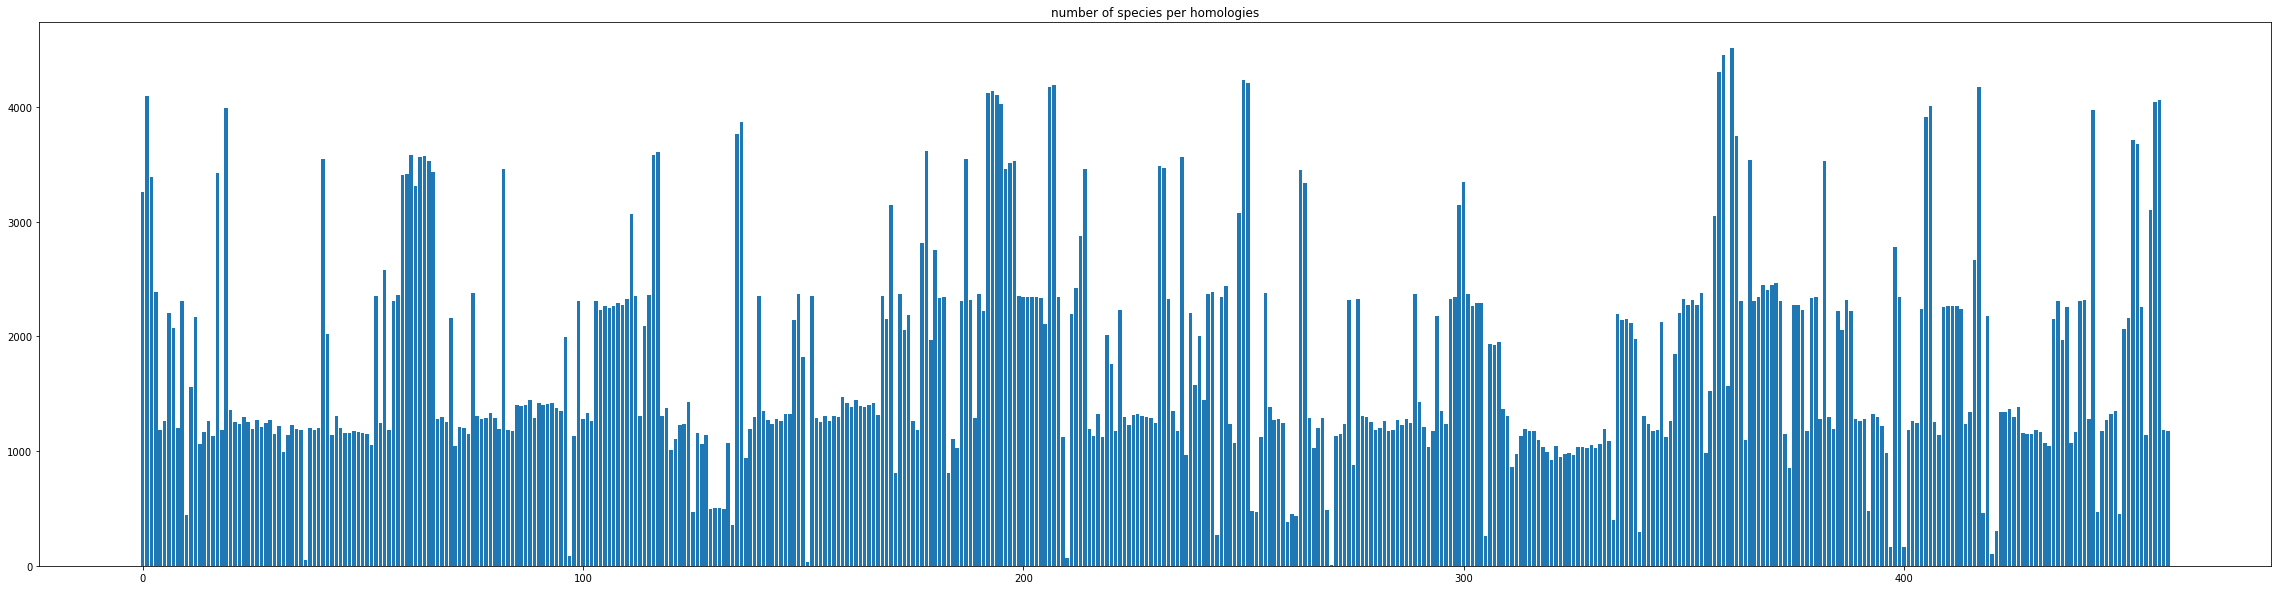

In [6]:
cub.all_homoset.plot_speciesperhomo()

you can always look at a particular range of species with 'homo_namelist' 


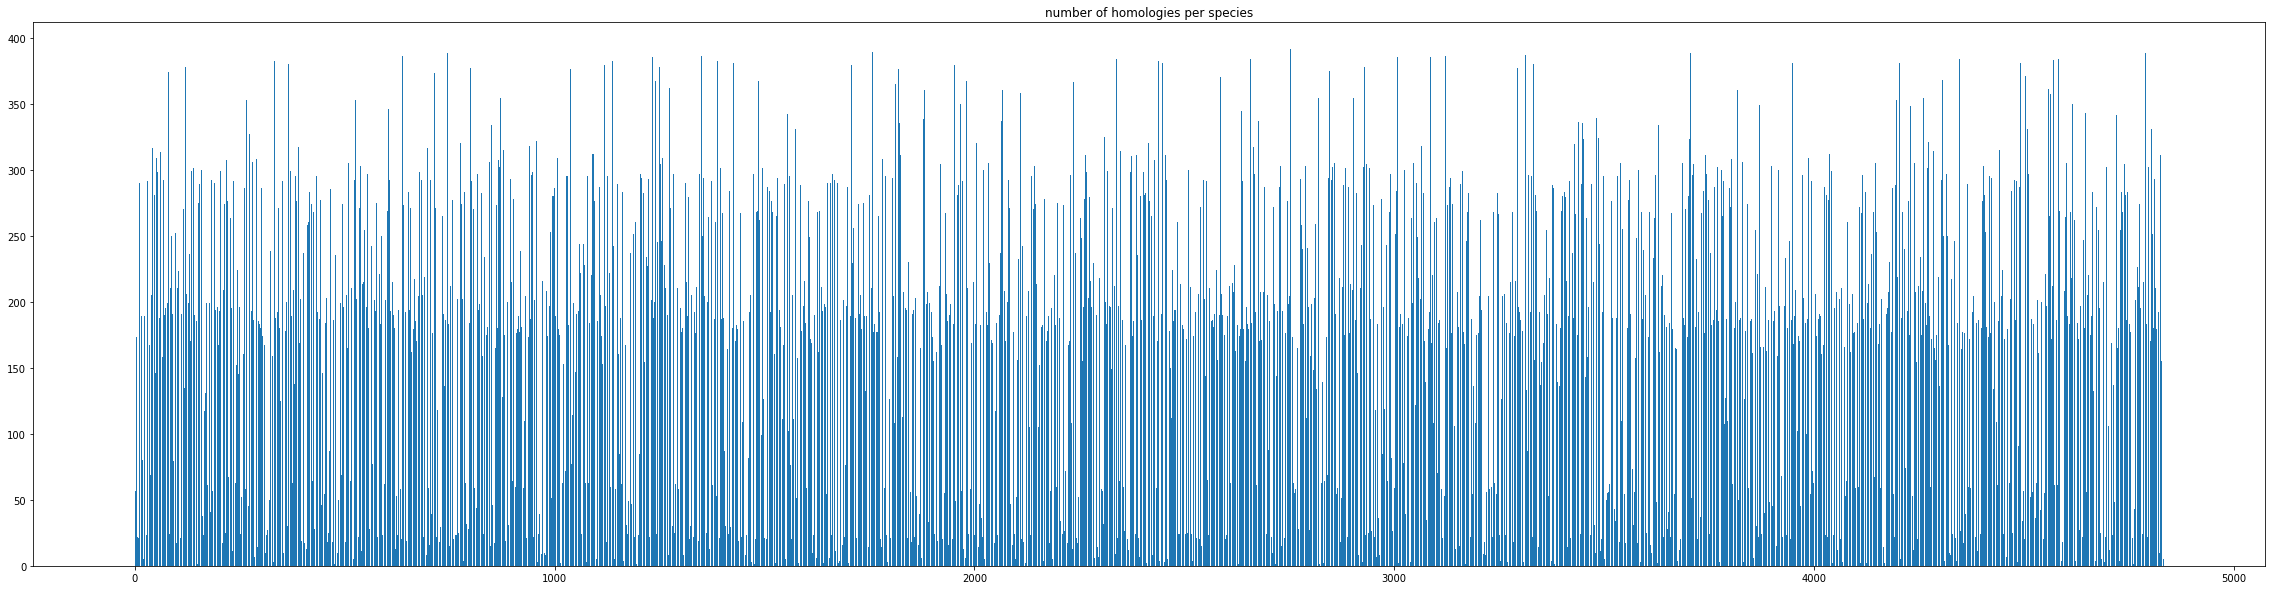

In [5]:
cub.all_homoset.plot_homoperspecies()

In [ ]:
cub.all_homoset.plot_all()
# it is super computationally expensive so below you can find a version with only 4000 genes

[t-SNE] Computing 181 nearest neighbors...
[t-SNE] Indexed 1938 samples in 0.003s...
[t-SNE] Computed neighbors for 1938 samples in 0.307s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1938
[t-SNE] Computed conditional probabilities for sample 1938 / 1938
[t-SNE] Mean sigma: 0.220391
[t-SNE] Computed conditional probabilities in 0.151s
[t-SNE] Iteration 50: error = 68.1373291, gradient norm = 0.0106859 (50 iterations in 5.740s)
[t-SNE] Iteration 100: error = 68.1375580, gradient norm = 0.0121794 (50 iterations in 7.130s)
[t-SNE] Iteration 150: error = 68.1372604, gradient norm = 0.0098372 (50 iterations in 8.934s)
[t-SNE] Iteration 200: error = 68.1377258, gradient norm = 0.0142939 (50 iterations in 6.324s)
[t-SNE] Iteration 250: error = 68.1377335, gradient norm = 0.0143823 (50 iterations in 6.421s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.137733
[t-SNE] Iteration 300: error = 1.6756126, gradient norm = 0.0014357 (50 iterations in 4.376s

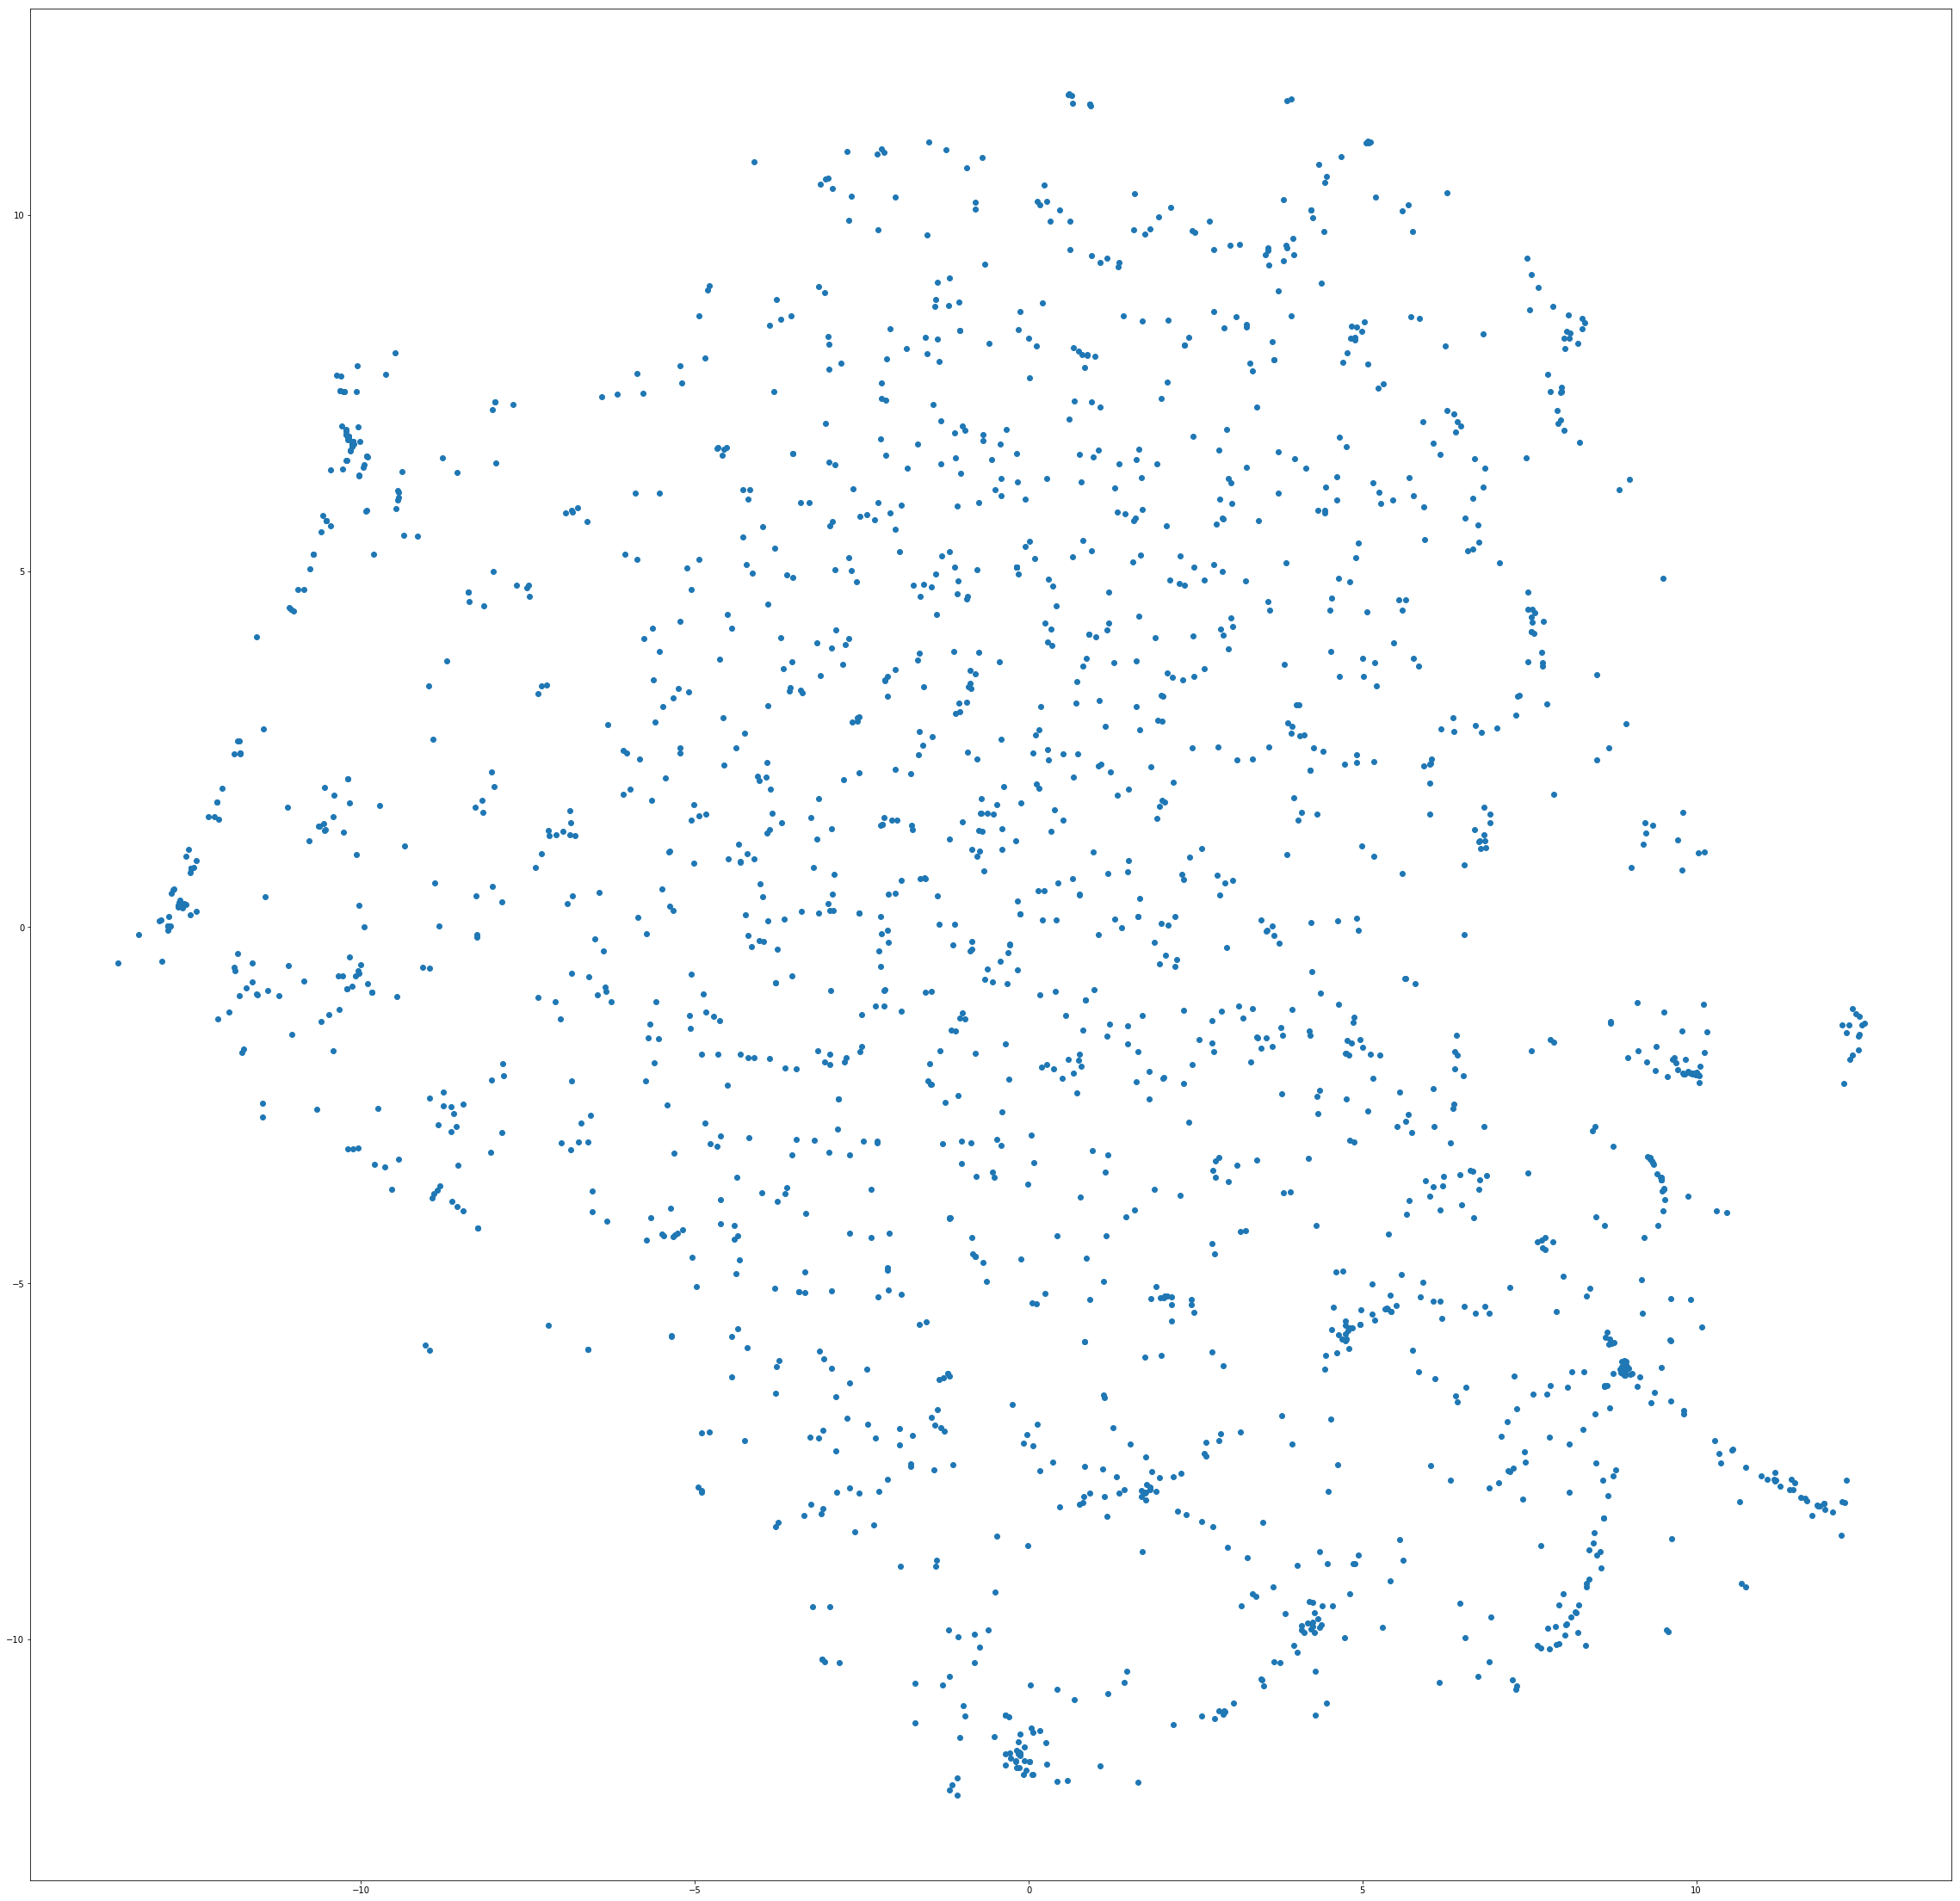

In [14]:
#the version

## We are now clustering our homologies

In this process we call `homoset.order_from_matrix` which will create groups of homologies which comprise similar species or groups of species which have similar homologies, this is for further methods where we will try to find correlation between species according to their homologies. 

obviously we can't use unrelated species, else it will bias our quest for correlation.

Here we have some different clustering methods at our disposal but as we work with binary vectors, `kmodes` seems to be better. We want to have 5 cluster (`homogroupnb`)

You can run it 1-and it will reorder iteratively to find the best set of species and homologies. this is very usefull

In [ ]:
cub.all_homoset.order_from_matrix(clustering='kmodes', homogroupnb=4, 
        plot_ordering=True, findnb=False, reducedim=False, byspecie=False)
#then you can say you want to order species also that will better solve the clustering problem
# you can select not to show the orderings

> /Users/jeremie/Documents/Projects/MasterProj/PyCUB/homoset.py(217)order_from_matrix()
-> if reducedim:
(Pdb) n
> /Users/jeremie/Documents/Projects/MasterProj/PyCUB/homoset.py(220)order_from_matrix()
-> if findnb is True:
(Pdb) n
> /Users/jeremie/Documents/Projects/MasterProj/PyCUB/homoset.py(222)order_from_matrix()
-> clusts = []
(Pdb) n
> /Users/jeremie/Documents/Projects/MasterProj/PyCUB/homoset.py(223)order_from_matrix()
-> while True:
(Pdb) n
> /Users/jeremie/Documents/Projects/MasterProj/PyCUB/homoset.py(224)order_from_matrix()
-> if clustering == "kmeans":
(Pdb) n
> /Users/jeremie/Documents/Projects/MasterProj/PyCUB/homoset.py(230)order_from_matrix()
-> elif clustering == "fast":
(Pdb) n
> /Users/jeremie/Documents/Projects/MasterProj/PyCUB/homoset.py(233)order_from_matrix()
-> elif clustering == "kmodes":
(Pdb) n
> /Users/jeremie/Documents/Projects/MasterProj/PyCUB/homoset.py(235)order_from_matrix()
-> alg = KModes(n_clusters=homogroupnb,
(Pdb) n
> /Users/jeremie/Documents/Proj

you can always look at a particular range of species with 'homo_namelist' 


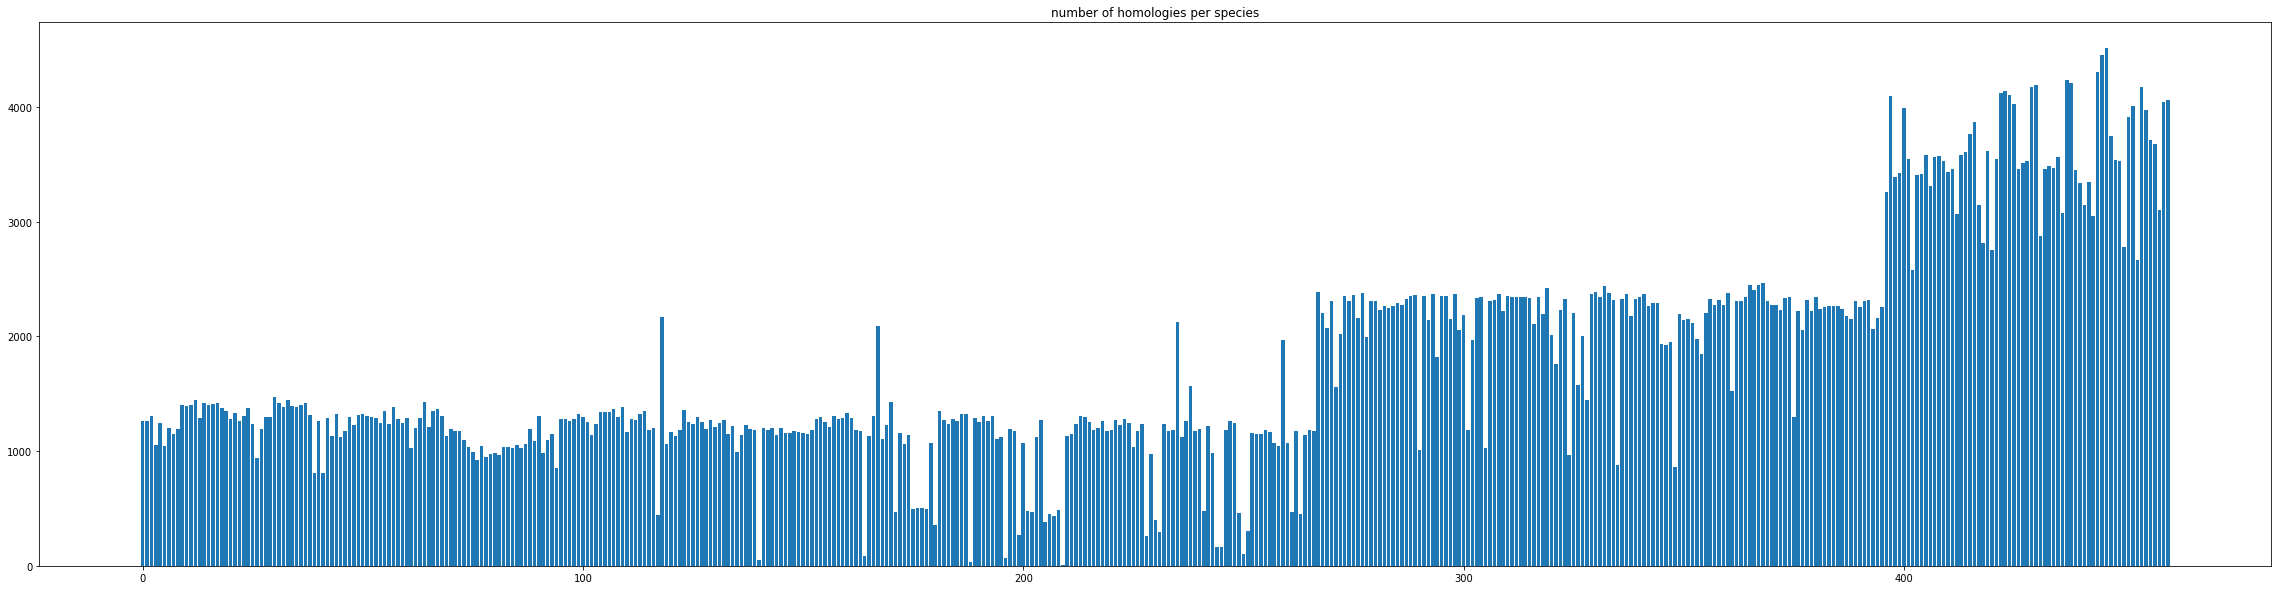

In [22]:
cub.all_homoset.plot_homoperspecies()

## you can create a sub homology group
for tha, you need to use get_working_homoset and you can now work from `cub.working_homoset`.
you can select species and homologies yourself or select one of the cluster from the previous clustering of the homologies

In [23]:
cub.get_working_homoset(per_cluster=True, clusternb=2, species=None, homologies=None)

KeyError: 0

## You can set whatever number or an homology name instead
#### you can see that you can access values directly from the `all_homoset` object
you can find more information such as the different data inside homoset by looking at the documentation which is (for now in the python code in a format ready to be latexified)


In [ ]:
cub.working_homoset[cub.working_homoset.homo_namelist[12]].plot()

## we can now cluster the gene of each homologies

using `find_cluster function` which will use here a clustering methods ( dbscan seems to be quite relevant for our needs), you select the number of groups you would like (it will choose a bit by itself however, according to the dataset) the assess allows you to use metrics to assess the clustering quality ( found in `homoset[homology].metrics`)

In [ ]:
cub.working_homoset.find_clusters(clustering='dbscan',homogroupnb=2, assess= True)

### now let's have nice interactive plottings to look at our clusters. 

we use TSNE and perplexity is an hyperparameter that change how the clustering is done. you should play with it

In [ ]:
p = cub.working_homoset['YBL063W'].plot(interactive = True, per = 40)

In [ ]:
pa = cub.working_homoset['YBL063W'].plot(interactive = True, per = 60)

### and let's save all that we have done ! 

(it is heavy file but quite small once compressed)

In [ ]:
cub.save('processedyun')

In [ ]:
cub.all_homoset.speciestable
#[cub.all_homoset.speciestable[name] for name in cub.all_homoset.homodict['YAL033W'].names]

In [ ]:
from sklearn.cluster import SpectralClustering

spectb = SpectralClustering(n_clusters=4, n_jobs=-1)
spectb.fit(similarities)

In [ ]:
plt.figure(figsize=(40,40))
plt.imshow(spectb.affinity_matrix_)
plt.show()

In [ ]:
spectb.labels_

# continuing tests

In [21]:
import sys, requests
server = "http://rest.ensemblgenomes.org"
#sequence ='ncrna'
ext = "/homology/id/"
ext += 'YBR160W' + '?'

if sequence is not None:
    # dna   cdna cds ncrna   Protein EMBL    GENBANK MySQL   TSV GTF GFF3
    ext += 'sequence=' + sequence
r = requests.get(server + ext, headers={"Content-Type": "application/json"})
if not r.ok:
    r.raise_for_status()
    sys.exit()
data = r.json()
print data

{u'data': [{u'id': u'YBR160W', u'homologies': [{u'taxonomy_level': u'Saccharomyces', u'target': {u'align_seq': u'ATGAGCGGTGAATTAGCAAATTACAAAAGACTTGAGAAAGTCGGTGAAGGTACATACGGTGTTGTTTATAAAGCGTTAGACTTAAGACCAGGCCAAGGTCAAAGAGTAGTCGCATTGAAGAAAATAAGACTAGAGAGTGAAGACGAGGGTGTTCCCAGTACAGCCATCAGAGAAATCTCATTATTGAAGGAATTAAAAGACGATAATATTGTCAGATTATACGATATTGTTCACTCTGATGCACACAAGCTATATCTTGTTTTTGAGTTCCTCGATTTGGACCTGAAAAGATATATGGAGGGTATTCCAAAGGACCAACCGTTAGGAGCTGATATTGTTAAGAAGTTTATGATGCAACTTTGTAAGGGTATTGCATACTGCCACTCACACCGTATTCTGCATCGTGATTTAAAACCCCAGAACTTATTGATTAACAAAGATGGGAATCTAAAACTAGGTGATTTTGGCTTAGCGCGTGCTTTTGGTGTTCCGTTGAGAGCTTACACACATGAAATTGTTACTCTATGGTATAGAGCTCCGGAGGTATTACTGGGTGGAAAACAATATAGTACAGGTGTCGATACATGGTCCATCGGCTGTATATTTGCCGAAATGTGTAACAGGAAACCAATCTTCAGTGGCGATAGTGAGATCGATCAGATTTTCAAGATATTCAGAGTATTGGGAACGCCGAATGAAGCTATATGGCCAGATATTGTCTACTTGCCTGATTTCAAGCCAAGCTTTCCTCAATGGCGCAGAAAAGACCTATCACAAGTGGTACCAAGTCTAGATCCACGCGGTATTGATTTGTTGGACAAACTCCTCGCGTATGACCCTATTAACCGGATTAGCGCCAGAAGAGCAGCCATCCACCCCTACTTCCA

In [ ]:
a

In [49]:
len(cub.all_homoset.clusters)

461

In [50]:
cub.all_homoset.hashomo_matrix.shape

(461, 4834)

NameError: name 'utils' is not defined

'B'